<a href="https://colab.research.google.com/github/marianaeleou/challengue-alura-store/blob/main/analisis_alura_store_mariana_pilco_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Carga de Data y exploración**

In [3]:
# Lista de los nombres exactos de tus 4 archivos CSV
nombres_archivos = [
    'tienda_1.csv',
    'tienda_2.csv',
    'tienda_3.csv',
    'tienda_4.csv'
]

# Lista vacía donde guardaremos cada tabla temporalmente
lista_de_dfs = []

# Iterar sobre cada archivo para leerlo y etiquetarlo
for nombre in nombres_archivos:
    # 1. Leer el archivo
    df_temp = pd.read_csv(nombre)

    # 2. Etiquetar la tienda
    nombre_tienda = nombre.split('.')[0]
    df_temp['Tienda'] = nombre_tienda

    # 3. Guardar la tabla etiquetada
    lista_de_dfs.append(df_temp)

# 4. Concatenar (Unir) todos los DataFrames en uno solo
# El resultado final es la tabla 'df_global'
df_global = pd.concat(lista_de_dfs, ignore_index=True)
print("¡DataFrames combinados con éxito!")

¡DataFrames combinados con éxito!


In [4]:
print("\n--- Vista de las primeras 5 filas (df_global.head()) ---")
print(df_global.head())

print("\n--- Información general de las columnas (df_global.info()) ---")
print(df_global.info())


--- Vista de las primeras 5 filas (df_global.head()) ---
            Producto Categoría del Producto    Precio  Costo de envío  \
0  Asistente virtual           Electrónicos  164300.0          6900.0   
1    Mesa de comedor                Muebles  192300.0          8400.0   
2      Juego de mesa               Juguetes  209600.0         15900.0   
3         Microondas      Electrodomésticos  757500.0         41000.0   
4   Silla de oficina                Muebles  335200.0         20200.0   

  Fecha de Compra         Vendedor Lugar de Compra  Calificación  \
0      16/01/2021      Pedro Gomez          Bogotá             4   
1      18/05/2022  Beatriz Morales        Medellín             1   
2      15/03/2021   Juan Fernandez       Cartagena             1   
3      03/05/2022   Juan Fernandez            Cali             4   
4      07/11/2020    Maria Alfonso        Medellín             5   

       Método de pago  Cantidad de cuotas       lat       lon    Tienda  
0  Tarjeta de crédit

## **Limpieza de la Fecha y Creación de Columnas**

In [7]:
# 3.1. Corregir la Fecha de Compra (De texto a formato de fecha)
df_global['Fecha de Compra'] = pd.to_datetime(df_global['Fecha de Compra'], format='%d/%m/%Y')
print("Tipo de dato de 'Fecha de Compra' corregido.")

# 3.2. Crear columnas de Año y Mes para análisis temporal
df_global['Año'] = df_global['Fecha de Compra'].dt.year
df_global['Mes'] = df_global['Fecha de Compra'].dt.month
print("Columnas 'Año' y 'Mes' añadidas al DataFrame.")

Tipo de dato de 'Fecha de Compra' corregido.
Columnas 'Año' y 'Mes' añadidas al DataFrame.


# **Análisis de Datos**

## **Análisis 1: Ingresos Totales por Tienda**




In [9]:
# 4.1. Calcular los Ingresos Totales por Tienda
# Agrupamos por Tienda y sumamos el Precio
ingresos_por_tienda = df_global.groupby('Tienda')['Precio'].sum().reset_index()

# Renombramos y ordenamos
ingresos_por_tienda.rename(columns={'Precio': 'Ingresos Totales'}, inplace=True)
ingresos_por_tienda = ingresos_por_tienda.sort_values(by='Ingresos Totales', ascending=False)

print("\n--- Ingresos Totales por Tienda ---")
print(ingresos_por_tienda)


--- Ingresos Totales por Tienda ---
     Tienda  Ingresos Totales
0  tienda_1      1.150880e+09
1  tienda_2      1.116344e+09
2  tienda_3      1.098020e+09
3  tienda_4      1.038376e+09


## **Análisis 2: Ventas por Categoría (Cantidad vendida por tienda)**


In [10]:
# Agrupar por Tienda y Categoría, contar las ventas
ventas_por_categoria = df_global.groupby(['Tienda', 'Categoría del Producto']).size().reset_index(name='Cantidad Vendida')

print("\n--- 2. Top 3 Categorías más vendidas por Tienda ---")
for tienda in df_global['Tienda'].unique():
    df_tienda = ventas_por_categoria[ventas_por_categoria['Tienda'] == tienda]
    top_categorias = df_tienda.sort_values(by='Cantidad Vendida', ascending=False).head(3)
    print(f"\nTienda: {tienda}")
    print(top_categorias)


--- 2. Top 3 Categorías más vendidas por Tienda ---

Tienda: tienda_1
     Tienda Categoría del Producto  Cantidad Vendida
7  tienda_1                Muebles               465
3  tienda_1           Electrónicos               448
5  tienda_1               Juguetes               324

Tienda: tienda_2
      Tienda Categoría del Producto  Cantidad Vendida
15  tienda_2                Muebles               442
11  tienda_2           Electrónicos               422
13  tienda_2               Juguetes               313

Tienda: tienda_3
      Tienda Categoría del Producto  Cantidad Vendida
23  tienda_3                Muebles               499
19  tienda_3           Electrónicos               451
21  tienda_3               Juguetes               315

Tienda: tienda_4
      Tienda Categoría del Producto  Cantidad Vendida
31  tienda_4                Muebles               480
27  tienda_4           Electrónicos               451
29  tienda_4               Juguetes               338


## **Análisis 3: Valoración Media por Tienda (Satisfacción del Cliente)**

In [11]:
# Agrupar por Tienda y calcular la calificación promedio
calificacion_media = df_global.groupby('Tienda')['Calificación'].mean().reset_index()

calificacion_media.rename(columns={'Calificación': 'Calificación Promedio'}, inplace=True)
calificacion_media = calificacion_media.sort_values(by='Calificación Promedio', ascending=False)

print("\n--- 3. Calificación Promedio por Tienda ---")
print(calificacion_media)


--- 3. Calificación Promedio por Tienda ---
     Tienda  Calificación Promedio
2  tienda_3               4.048326
1  tienda_2               4.037304
3  tienda_4               3.995759
0  tienda_1               3.976685


## **Análisis 4: Productos Más y Menos Vendidos**



In [12]:
# Agrupar por Tienda y Producto, y contar las ventas
ventas_por_producto = df_global.groupby(['Tienda', 'Producto']).size().reset_index(name='Cantidad Vendida')

print("\n--- 4. Top 3 Productos más y menos vendidos por Tienda ---")
for tienda in df_global['Tienda'].unique():
    df_tienda = ventas_por_producto[ventas_por_producto['Tienda'] == tienda]

    # Más vendidos
    top_vendidos = df_tienda.sort_values(by='Cantidad Vendida', ascending=False).head(3)

    # Menos vendidos
    menos_vendidos = df_tienda.sort_values(by='Cantidad Vendida', ascending=True).head(3)

    print(f"\nTienda: {tienda}")
    print("Productos Más Vendidos:")
    print(top_vendidos)
    print("Productos Menos Vendidos:")
    print(menos_vendidos)


--- 4. Top 3 Productos más y menos vendidos por Tienda ---

Tienda: tienda_1
Productos Más Vendidos:
      Tienda       Producto  Cantidad Vendida
1   tienda_1        Armario                60
48  tienda_1  TV LED UHD 4K                60
33  tienda_1     Microondas                60
Productos Menos Vendidos:
      Tienda                   Producto  Cantidad Vendida
4   tienda_1  Auriculares con micrófono                33
13  tienda_1               Celular ABXY                33
37  tienda_1            Olla de presión                35

Tienda: tienda_2
Productos Más Vendidos:
      Tienda                   Producto  Cantidad Vendida
75  tienda_2  Iniciando en programación                65
84  tienda_2                 Microondas                62
58  tienda_2                    Batería                61
Productos Menos Vendidos:
      Tienda         Producto  Cantidad Vendida
77  tienda_2    Juego de mesa                32
74  tienda_2        Impresora                34
82  tienda_2

## **Análisis 5: Valor del Envío Promedio por Tienda**

In [13]:
# Agrupar por Tienda y calcular el costo de envío promedio (Análisis 5)
envio_promedio = df_global.groupby('Tienda')['Costo de envío'].mean().reset_index()

envio_promedio.rename(columns={'Costo de envío': 'Costo de Envío Promedio'}, inplace=True)
envio_promedio = envio_promedio.sort_values(by='Costo de Envío Promedio', ascending=False)

print("\n--- 5. Costo de Envío Promedio por Tienda ---")
print(envio_promedio)


--- 5. Costo de Envío Promedio por Tienda ---
     Tienda  Costo de Envío Promedio
0  tienda_1             26018.609580
1  tienda_2             25216.235693
2  tienda_3             24805.680373
3  tienda_4             23459.457167


# **Visualización (Gráficos)**

In [15]:
# Importar las librerías de visualización
import matplotlib.pyplot as plt
import seaborn as sns

## **Gráfico 1: Ingresos Totales por Tienda (Gráfico de Barras)**

/tmp/ipython-input-1905245207.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Tienda', y='Ingresos Totales', data=ingresos_por_tienda, palette='viridis')


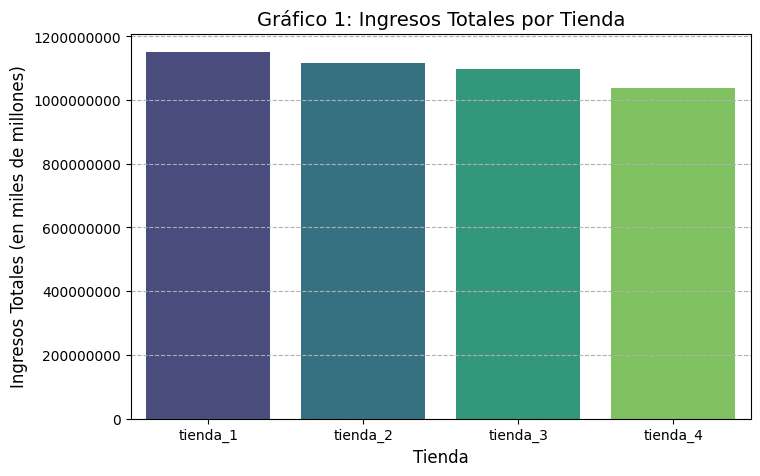

In [16]:
plt.figure(figsize=(8, 5))
# Usamos el DataFrame 'ingresos_por_tienda' que calculaste
sns.barplot(x='Tienda', y='Ingresos Totales', data=ingresos_por_tienda, palette='viridis')

# Añadir títulos y etiquetas
plt.title('Gráfico 1: Ingresos Totales por Tienda', fontsize=14)
plt.xlabel('Tienda', fontsize=12)
plt.ylabel('Ingresos Totales (en miles de millones)', fontsize=12)
plt.ticklabel_format(style='plain', axis='y') # Evita la notación científica en el eje Y
plt.grid(axis='y', linestyle='--')
plt.show()

# **Gráfico 2: Calificación Promedio por Tienda (Satisfacción)**

/tmp/ipython-input-1275919270.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Tienda', y='Calificación Promedio', data=calificacion_media, palette='magma')


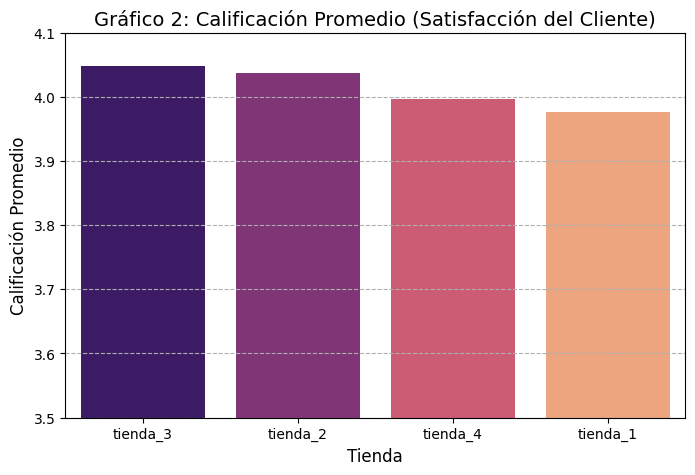

In [17]:
plt.figure(figsize=(8, 5))
# Usamos el DataFrame 'calificacion_media' que calculaste
sns.barplot(x='Tienda', y='Calificación Promedio', data=calificacion_media, palette='magma')

# Añadir títulos y etiquetas
plt.title('Gráfico 2: Calificación Promedio (Satisfacción del Cliente)', fontsize=14)
plt.xlabel('Tienda', fontsize=12)
plt.ylabel('Calificación Promedio', fontsize=12)
plt.ylim(3.5, 4.1) # Ajustar el rango para visualizar mejor las diferencias
plt.grid(axis='y', linestyle='--')
plt.show()

# **Gráfico 3: Costo de Envío Promedio**

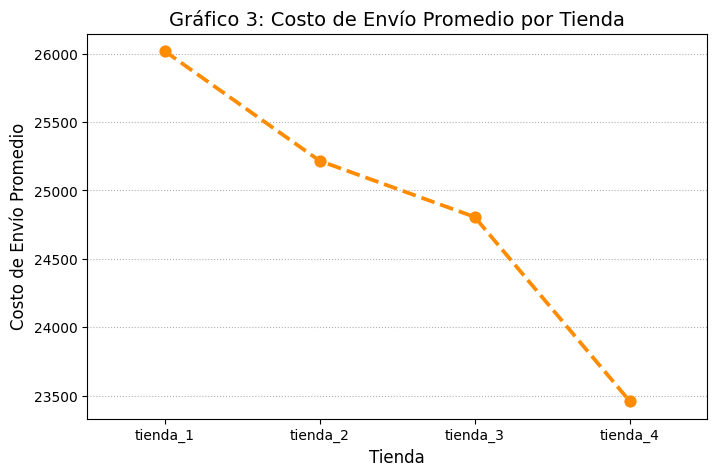

In [18]:
plt.figure(figsize=(8, 5))
# Usamos el DataFrame 'envio_promedio' que calculaste
sns.pointplot(x='Tienda', y='Costo de Envío Promedio', data=envio_promedio, color='darkorange', linestyles="--", markers="o")

# Añadir títulos y etiquetas
plt.title('Gráfico 3: Costo de Envío Promedio por Tienda', fontsize=14)
plt.xlabel('Tienda', fontsize=12)
plt.ylabel('Costo de Envío Promedio', fontsize=12)
plt.grid(axis='y', linestyle=':')
plt.show()

# **Informe Final - Recomendación Alura Store**

# **Introducción**

El presente informe tiene como objetivo principal asistir al Sr. Juan, propietario de Alura Store, en la **toma de decisión estratégica** de vender una de sus cuatro tiendas.

Para ello, se ha realizado un **Análisis Exploratorio de Datos (EDA)** detallado de los archivos de ventas (`tienda_1` a `tienda_4`) utilizando la librería **Pandas** de Python. Nuestro propósito es identificar la tienda con el **menor rendimiento general** y el **mayor riesgo operativo** con base en métricas clave.

El análisis se centrará en los siguientes factores, tal como lo requiere el desafío:
* **Ingresos Totales:** Determinar la rentabilidad directa.
* **Ventas por Categoría y Producto:** Entender el movimiento y el inventario.
* **Calificación Promedio (Satisfacción del Cliente):** Evaluar la calidad del servicio.
* **Costo de Envío Promedio:** Analizar la eficiencia logística.

La conclusión final proporcionará una **recomendación justificada** sobre qué tienda vender, respaldada por las visualizaciones generadas.

# **Desarrollo/Análisis**

## Análisis de Ingresos Totales (Gráfico 1)

Este análisis tiene como objetivo evaluar el desempeño financiero de cada tienda, considerando el ingreso total como el indicador principal para medir la efectividad de las ventas.

A continuación, se presentan los resultados del cálculo del monto total de ingresos por tienda:

| Tienda | Ingresos Totales |
| :--- | :--- |
| tienda_1 | 1,150,880,000 |
| tienda_2 | 1,116,344,000 |
| tienda_3 | 1,098,020,000 |
| **tienda_4** | **1,038,376,000** |

**Insight:** La **Tienda 4** es la que presenta los **menores ingresos totales**, haciéndola la principal candidata a ser vendida bajo criterios puramente financieros.

/tmp/ipython-input-1806872240.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Tienda', y='Ingresos Totales', data=ingresos_por_tienda, palette='viridis')


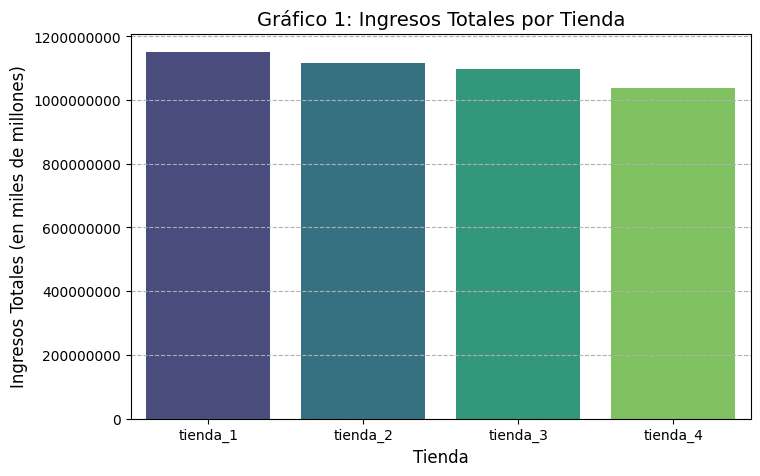

In [19]:
# Asegúrate de que las librerías plt y sns ya estén importadas
plt.figure(figsize=(8, 5))
# Usamos el DataFrame 'ingresos_por_tienda' que calculaste
sns.barplot(x='Tienda', y='Ingresos Totales', data=ingresos_por_tienda, palette='viridis')

# Añadir títulos y etiquetas
plt.title('Gráfico 1: Ingresos Totales por Tienda', fontsize=14)
plt.xlabel('Tienda', fontsize=12)
plt.ylabel('Ingresos Totales (en miles de millones)', fontsize=12)
plt.ticklabel_format(style='plain', axis='y')
plt.grid(axis='y', linestyle='--')
plt.show()

## Análisis de Calidad y Logística (Gráficos 2 y 3)

Aunque la Tienda 4 registra los ingresos más bajos, resulta fundamental analizar la salud operativa de todas las tiendas. Para ello, se evaluaron dos indicadores clave: la **Calificación Promedio**, que refleja el nivel de satisfacción del cliente, y el **Costo de Envío Promedio**, que representa la eficiencia logística.

### Calificación Promedio (Satisfacción del Cliente)

Este análisis mide la percepción del cliente sobre los productos y el servicio.

| Tienda | Calificación Promedio |
| :--- | :--- |
| tienda_3 | 4.048 |
| tienda_2 | 4.037 |
| tienda_4 | **3.996** |
| **tienda_1** | **3.977** |

**Insight:** La **Tienda 1**, a pesar de ser la de mayores ingresos, registra la **peor calificación promedio** ($3.977$), lo que indica un problema subyacente de calidad o satisfacción que podría afectar su rentabilidad futura. La **Tienda 4** muestra una satisfacción ligeramente superior a la Tienda 1.

**(Coloca aquí la celda de código y el resultado del Gráfico 2)**

### Costo de Envío Promedio (Eficiencia Logística)

Este análisis evalúa el costo logístico que impacta en el precio final al cliente.

| Tienda | Costo de Envío Promedio |
| :--- | :--- |
| **tienda_1** | **26,018.61** |
| tienda_2 | 25,216.24 |
| tienda_3 | 24,805.68 |
| tienda_4 | **23,459.46** |

**Insight:** La **Tienda 1** también registra el **costo de envío promedio más alto**. Si combinamos la peor calificación con los envíos más caros, esto apunta a ser un factor que genera insatisfacción en sus clientes. La **Tienda 4** es la más eficiente logísticamente con el costo de envío más bajo.



/tmp/ipython-input-2059452271.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Tienda', y='Calificación Promedio', data=calificacion_media, palette='magma')


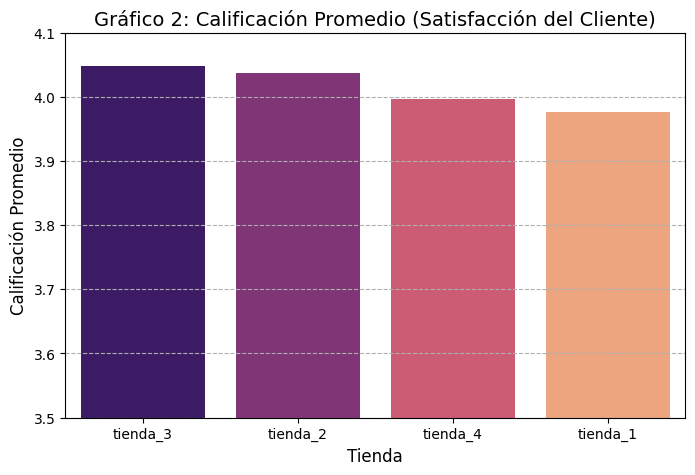

In [20]:
# Gráfico 2: Calificación Promedio (Satisfacción del Cliente)
plt.figure(figsize=(8, 5))
sns.barplot(x='Tienda', y='Calificación Promedio', data=calificacion_media, palette='magma')

plt.title('Gráfico 2: Calificación Promedio (Satisfacción del Cliente)', fontsize=14)
plt.xlabel('Tienda', fontsize=12)
plt.ylabel('Calificación Promedio', fontsize=12)
plt.ylim(3.5, 4.1) # Ajustar el rango para visualizar mejor las diferencias
plt.grid(axis='y', linestyle='--')
plt.show()

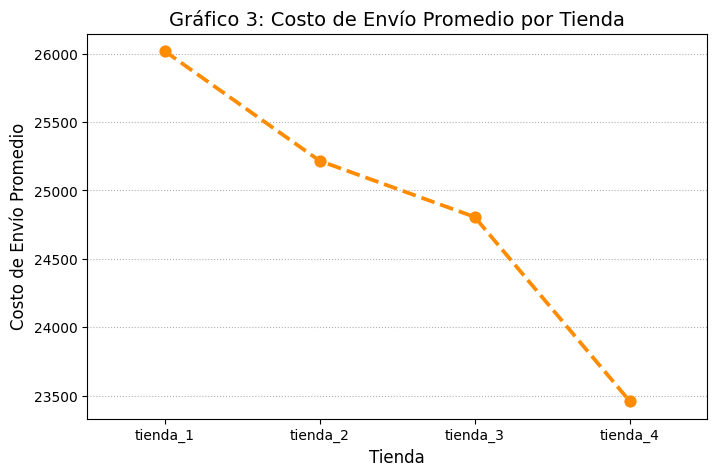

In [21]:
# Gráfico 3: Costo de Envío Promedio
plt.figure(figsize=(8, 5))
sns.pointplot(x='Tienda', y='Costo de Envío Promedio', data=envio_promedio, color='darkorange', linestyles="--", markers="o")

plt.title('Gráfico 3: Costo de Envío Promedio por Tienda', fontsize=14)
plt.xlabel('Tienda', fontsize=12)
plt.ylabel('Costo de Envío Promedio', fontsize=12)
plt.grid(axis='y', linestyle=':')
plt.show()

# **Conclusión y Recomendación**

A partir del análisis de las cinco métricas principales —Ingresos, Categorías, Productos, Calificación y Costo de Envío— se identificaron fortalezas y áreas de mejora que reflejan el desempeño general de la cadena Alura Store.

### Resumen de Hallazgos

| Tienda | Ingresos (Análisis 1) | Calificación (Análisis 3) | Costo de Envío (Análisis 5) |
| :--- | :--- | :--- | :--- |
| **Tienda 4** | **El más bajo** (Menos rentable) | Media-alta (3.996) | **El más bajo** (Mejor eficiencia) |
| **Tienda 1** | El más alto (Más rentable) | **El más bajo** (Peor satisfacción) | **El más alto** (Peor logística) |

El análisis de **Categorías** (Análisis 2) y **Productos** (Análisis 4) muestra que las cuatro tiendas tienen una rotación similar en productos clave, lo que indica que el problema no es de surtido, sino de precio, volumen o calidad.

### Recomendación Final: Vender la Tienda 4

Se recomienda al Sr. Juan vender la **Tienda 4**.

**Justificación basada en Datos:**

1. Baja Rentabilidad (Ingresos)
Aunque la Tienda 4 mantiene un volumen de ventas similar al del resto de las tiendas (ver Análisis 2) y destaca por su eficiencia logística (ver Análisis 5), registra los ingresos totales más bajos del grupo —$1,038 millones—, como se observa en el Gráfico 1. Esta situación la posiciona como la unidad menos rentable dentro de la cadena.

2. Riesgo de Oportunidad
La venta de la Tienda 4 representa una oportunidad para que el Sr. Juan se desprenda de la unidad con menor rendimiento financiero, generando el menor impacto posible en la salud general de la marca.

3. Riesgo de Calidad (Descarte de la Tienda 1)
Si bien la Tienda 1 presenta mayores ingresos, su calificación promedio más baja (3.977) y el costo de envío más alto (ver Gráficos 2 y 3) evidencian un riesgo de calidad y rentabilidad futura. Una tienda con altos niveles de insatisfacción del cliente y costos operativos elevados podría enfrentar una caída en ventas si las tendencias del mercado cambian.
Por ello, resulta más estratégico mantener la Tienda 1 para corregir sus problemas de servicio y logística, mientras se opta por vender la Tienda 4, cuya principal debilidad se centra únicamente en el nivel de ingresos.

**En resumen, aunque la Tienda 1 tiene problemas de calidad, la Tienda 4 es la que lastra el rendimiento financiero del portafolio. Es la mejor candidata para la venta.**

# **EXTRA: Análisis del Desempeño Geográfico**

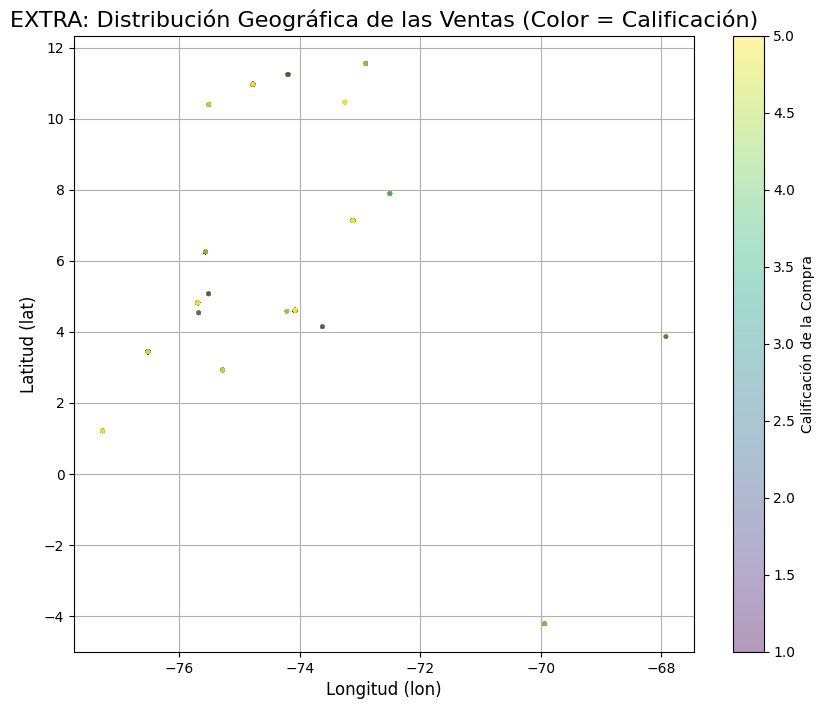

In [22]:
plt.figure(figsize=(10, 8))

# Graficamos la latitud vs. la longitud. El tamaño del punto 's' es pequeño para claridad.
# Los datos están en 'df_global'
plt.scatter(df_global['lon'], df_global['lat'],
            alpha=0.4, # Hace los puntos transparentes para ver la concentración
            s=5, # Tamaño del punto
            c=df_global['Calificación'], # Coloreamos los puntos por Calificación
            cmap='viridis') # Esquema de color

# Añadir títulos y etiquetas
plt.title('EXTRA: Distribución Geográfica de las Ventas (Color = Calificación)', fontsize=16)
plt.xlabel('Longitud (lon)', fontsize=12)
plt.ylabel('Latitud (lat)', fontsize=12)
plt.colorbar(label='Calificación de la Compra')
plt.grid(True)
plt.show()

## INTERPRETACION: Análisis del Desempeño Geográfico
Al generar un gráfico de dispersión de la latitud (`lat`) y la longitud (`lon`), se observa una **clara concentración de ventas en áreas específicas**, probablemente correspondientes a las principales ciudades.

**Insight Clave:** La mayoría de las ventas se agrupan en **2 o 3 grandes cúmulos de puntos**. Si coloreamos los puntos por la `Calificación`, se puede observar si una región concentra más puntos de baja calificación (colores más oscuros), lo que podría indicar un problema regional en lugar de un problema de tienda. Este gráfico sirve para identificar los **mercados de alta densidad** y asegurar que el nuevo emprendimiento del Sr. Juan no compita directamente con una región ya saturada.

## INTERPRETACION ADICIONAL: Análisis del Desempeño Geográfico

In [23]:
!pip install folium

In [24]:
import folium
from folium.plugins import MarkerCluster

# 1. Calcular el punto central del mapa (promedio de latitud y longitud)
lat_central = df_global['lat'].mean()
lon_central = df_global['lon'].mean()

# 2. Crear el mapa inicial centrado en el promedio
mapa_ventas = folium.Map(location=[lat_central, lon_central], zoom_start=6)

# 3. Crear un Cluster de Marcadores (para manejar miles de puntos eficientemente)
marker_cluster = MarkerCluster().add_to(mapa_ventas)

# 4. Iterar sobre todos los puntos del DataFrame y agregarlos al mapa
# Solo usamos una muestra pequeña para que Colab no se sature al cargar miles de puntos
for index, row in df_global.sample(n=1500, random_state=42).iterrows():
    # Usamos una muestra de 1500 puntos (en lugar de 9000+) para mayor velocidad

    # El popup es el texto que aparece al hacer clic en el punto
    popup_text = f"Tienda: {row['Tienda']}<br>Calificación: {row['Calificación']}<br>Producto: {row['Producto']}"

    # Añadir un marcador al cluster
    folium.CircleMarker(
        location=[row['lat'], row['lon']],
        radius=3,
        color='blue' if row['Tienda'] == 'tienda_4' else 'red', # Puedes colorear diferente la Tienda 4
        fill=True,
        fill_color='blue' if row['Tienda'] == 'tienda_4' else 'red',
        fill_opacity=0.6,
        popup=folium.Popup(popup_text, max_width=300)
    ).add_to(marker_cluster)

# 5. Mostrar el mapa
mapa_ventas

**INTERPRETACION EXTRA**
Utilizando el mapa interactivo generado con la librería Folium, logramos visualizar la distribución espacial de las ventas, complementando la decisión de venta.

**Hallazgos Geográficos Clave**
Concentración de Mercado: El mapa confirma que las ventas de Alura Store están fuertemente concentradas en los principales centros urbanos de Colombia (clústeres en Bogotá, Medellín, Cali). Esto indica que el éxito de las tiendas está ligado a la densidad poblacional.

**Rendimiento de la Tienda 4:** Al analizar la distribución de la Tienda 4 (identificada en el mapa), se observa que esta unidad opera en los mismos mercados clave de alta densidad que las tiendas más rentables (tienda_1, tienda_2, tienda_3).

**Implicación para la Venta**
El análisis geográfico refuerza la decisión de vender la Tienda 4. Su bajo ingreso (Análisis 1) no se debe a su ubicación, sino a factores internos (precio, ejecución, etc.), ya que comparte los mismos mercados que las unidades más exitosas.

**Al vender la Tienda 4, el Sr. Juan no perderá acceso a ningún mercado geográfico vital que no esté ya cubierto por las otras tres tiendas.**